In [5]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm

from ds_utils.db.connectors import HealthcareDW



In [6]:
df = pd.read_csv('/Users/trevor/data/google_lead_scores.csv')
df = df[['prob']].rename(columns={'prob': 'lead_score'})
df.head()

,lead_score
0,0.013926
1,0.020427
2,0.037647
3,0.025580
4,0.072981


In [7]:
len(df)

189163

array([[<AxesSubplot:title={'center':'lead_score'}>]], dtype=object)

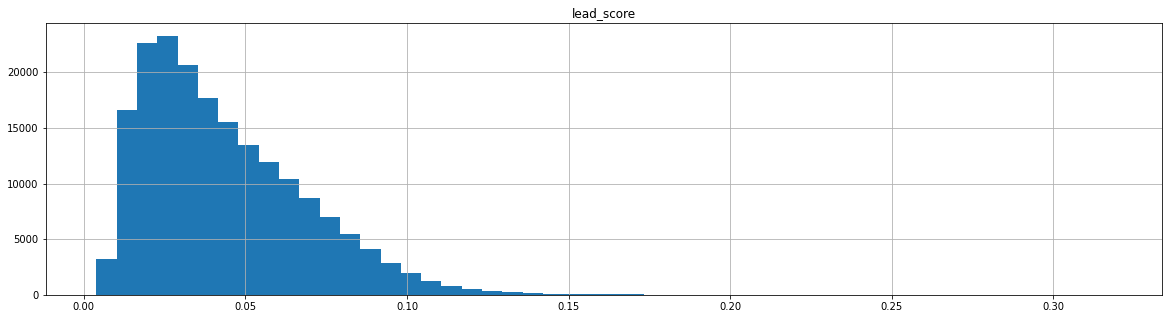

In [18]:
df.hist(bins=50, figsize=(20,5))

array([[<AxesSubplot:title={'center':'lead_score'}>]], dtype=object)

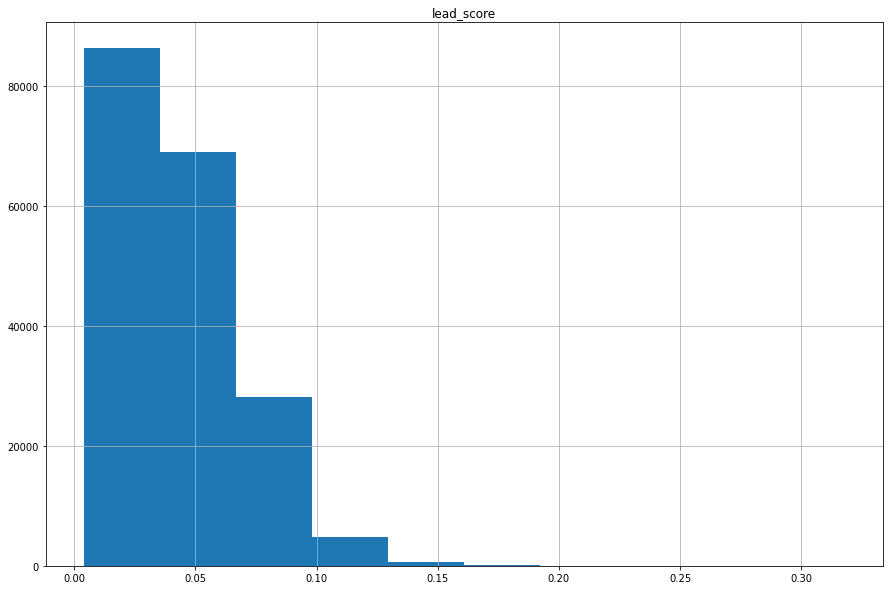

In [15]:
df.hist(bins=10, figsize=(15,10))

In [9]:
population_mean = df['lead_score'].mean()

# 5 to 1000 in increments of 5
sample_sizes = [n + 1 for n in range(100)]
simulations = 1000

simulation_output = list()
for n_samples in sample_sizes:
    simulation_ls = list()
    for _ in range(simulations):
        sample_mean = df['lead_score'].sample(n_samples, replace=True).mean()
        pct_error = abs(sample_mean - population_mean) / population_mean
        simulation_ls.append(pct_error)
        
    sim_mean = np.mean(simulation_ls)
    sim_lower, sim_upper = sm.stats.DescrStatsW(simulation_ls).tconfint_mean()
    simulation_output.append([n_samples, sim_mean, sim_lower, sim_upper])
    
    
error_df = pd.DataFrame(simulation_output, columns=['sample_size', 'mean_percent_error', 'lower_ci', 'upper_ci'])

error_df.head()

,sample_size,mean_percent_error,lower_ci,upper_ci
0,1,0.446429,0.424699,0.468159
1,2,0.323950,0.308346,0.339554
2,3,0.261548,0.249163,0.273934
3,4,0.227960,0.217207,0.238713
4,5,0.204392,0.194671,0.214112


<AxesSubplot:xlabel='sample_size'>

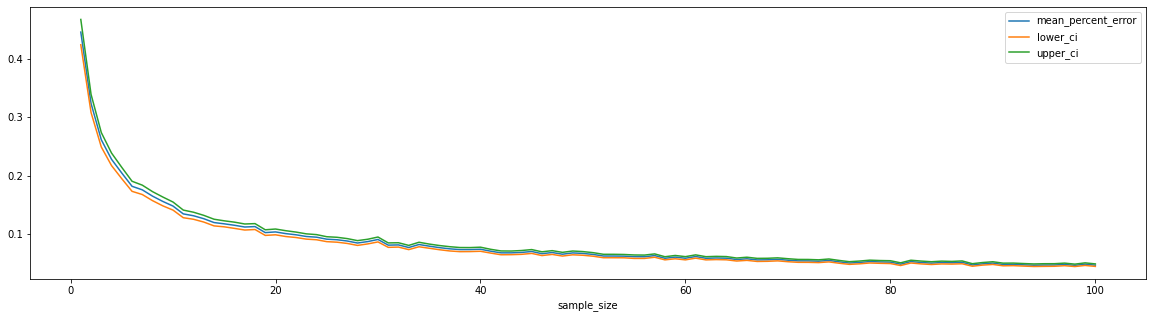

In [19]:
error_df.set_index('sample_size').plot(figsize=(20,5))